   ### EXPLORATORY DATA ANALYSIS ON NYC TAXI TRIP DURATION ###


<img src="https://www.brickunderground.com/sites/default/files/styles/new_blog_entry_primary_image_xl/public/blog/images/4859177053_c3fb190917_o.webp" >

### Importing libraries ###


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
import warnings
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')

## Import data ##


In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')


### STRUCTURE OF DATA AND CONTENT ###

In [3]:
data.shape


(729322, 11)

#### we can see that there are 729322 rows and 11 columns ####



## Data collection ##



The variables present are listed as follows :


 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

 
 
 It is to be noted that the dropoff_datetime and store_and_fwd_flag are not present at the start of the journey 

 #### Checking the columns for what all variables are present and it can be confirmed that we have all the variables  as mentioned in the project ####

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Looking at the data we can see what all datatypes that are present and get a general overview ###

In [5]:
# a view of datatypes that are present
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
# sample of first 5 rows to understand how values are represented
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [7]:
# sample of last 5 rows to recognise any trends
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


## REFORMATTING FEATURES AND CHECKING CONSISTENCY ##

## Checking for missing values ##

In [8]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**There is no null values present hence we dont have to assign any values**


### Analysing each variable datatypes

In [9]:
# INTEGER DATATYPE

data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

**observations:**

**vendor_id** are the provider identification thus it is considered categorical

**passenger_count** can be take as categorical for better analysis

**trip_duration** are numbers hence they are also fall in integer category

In [10]:
# typecasting passenger count to category
data['passenger_count'] = data['passenger_count'].astype('category')


In [11]:
# FLOAT DATATYPE
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

**observations:**

**pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude** are suited to in float datatype

In [12]:
# OBJECT DATATYPE
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

**Observations:**

**id** is a unique variable with numerical parts and id written at front and I choose to treat it as an object itself

**pickup_datetime and dropoff_datetime** are datetime variable

**store_and_fwd_flag** can be grouped under categorical

In [13]:
# typecasting store_and_fwd_flag to category
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [14]:
# Convert into datetime DATA TYPE from strings
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [15]:
#function to find the distance traversed
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return geopy.distance.distance(pickup, drop).km

In [16]:
#adding distance column in the dataframe
data['distance'] = data.apply(lambda x: calc_distance(x), axis = 1)

In [17]:
#calculating the data and imputing the speed into the dataframe
data['speed'] = (data.distance/(data.trip_duration/3600))

In [18]:
#for heat map later
datacp = data

In [19]:
#Using datetime to find and create new columns - day_name , month, day_num, pickup_hour

data['day_name'] = data.pickup_datetime.dt.day_name()
data['month'] = data.pickup_datetime.dt.month
data['day_num'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

In [20]:
#typecasting month, day_num, pickup_hour to category
data['month'] = data['month'].astype('category')
data['day_num'] = data['day_num'].astype('category')
data['pickup_hour'] = data['pickup_hour'].astype('category')

In [21]:
#the variable datatypes are analysed
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
distance                     float64
speed                        float64
day_name                      object
month                       category
day_num                     category
pickup_hour                 category
dtype: object

In [22]:
#all the categorical variable are converted to numerical

dummy = pd.get_dummies(data.store_and_fwd_flag, prefix='flag')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.vendor_id, prefix='vendor_id')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.month, prefix='month')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.day_num, prefix='day_num')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_hour, prefix='pickup_hour')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.passenger_count, prefix='passenger_count')
data = pd.concat([data,dummy], axis = 1)


In [23]:
pd.set_option('display.max_columns', None)


In [24]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,day_name,month,day_num,pickup_hour,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_num_0,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199770,10.797929,Monday,2,0,16,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.123945,13.496548,Friday,3,4,23,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250436,15.964262,Sunday,2,6,17,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.358287,7.440694,Tuesday,1,1,9,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328155,18.374244,Wednesday,2,2,6,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## To check whether there is inconsistency in data wrt the drop location and trip duration

In [25]:
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(0, 68)

**There seems to be no inconsistency**

# UNIVARIATE ANALYSIS #

## Vendor ##

In [26]:
data.vendor_id.value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

**It is clear that there are only two vendors offering their service considered in this dataset labelled as 1 and 2**

Text(0.5, 0, 'vendor_distribution_pie_chart')

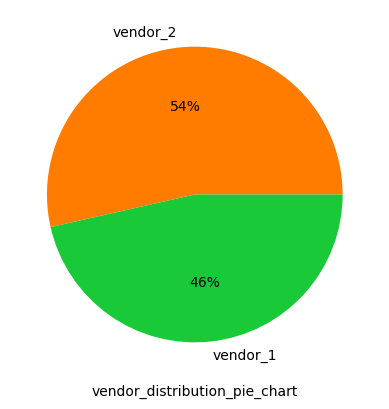

In [27]:
colors = sns.color_palette('bright')[1:3]
plt.pie(data.vendor_id.value_counts(), labels = ['vendor_2','vendor_1'], colors = colors, autopct='%.0f%%')
plt.xlabel('vendor_distribution_pie_chart')


**Both the vendors have fairly similar market share but vendor 2 has a edge over the number of trips made by about 8%**

## Passenger count ##

In [28]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

Text(0.5, 0, 'passenger_count_piechart')

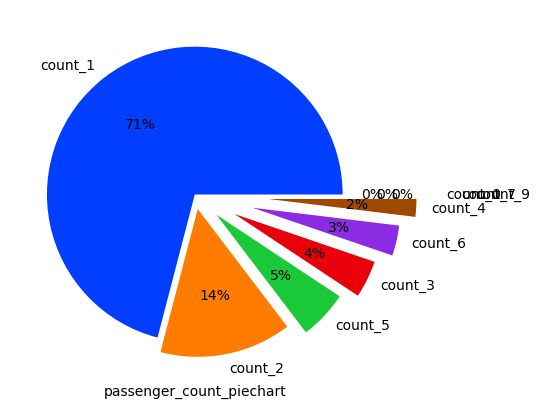

In [29]:
colors = sns.color_palette('bright')[0:9]
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5 ,0.6,0.7, 0.8)
plt.pie(data.passenger_count.value_counts(), labels = ['count_1', 'count_2', 'count_5', 'count_3' ,'count_6','count_4', 'count_0', 'count_7', 'count_9'], explode=explode , colors = colors, autopct='%.0f%%')
plt.xlabel('passenger_count_piechart')

**Note the presence of outliers**

<AxesSubplot:>

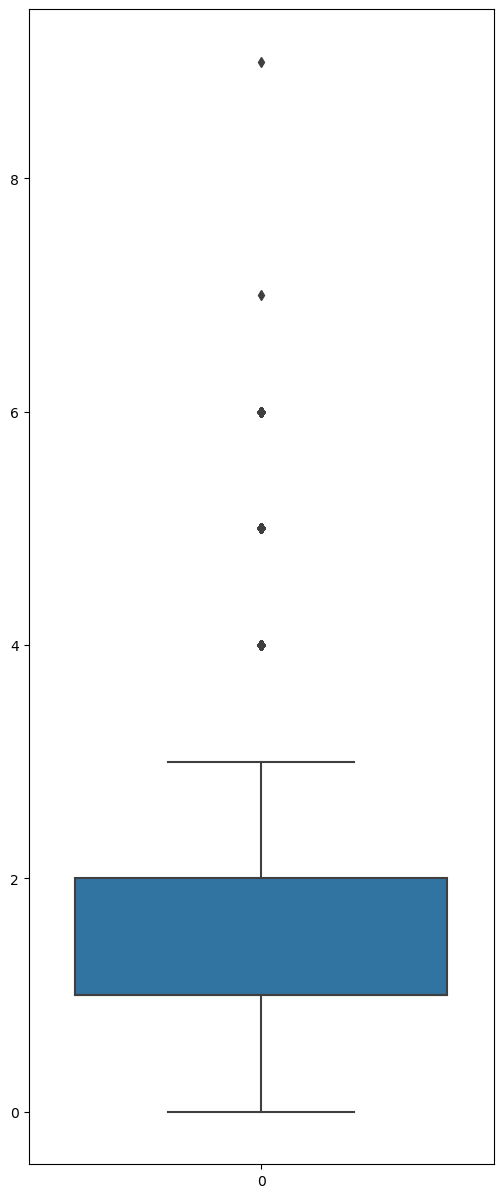

In [30]:
fig = plt.figure(figsize =(6, 15))

sns.boxplot(data = data["passenger_count"])


**Observations:**

- we can see that there are outliers of 7 and 9 passengers

- Majority of trips are with 1 or 2 passengers

- Trips with passenger count of zero are present which is unusual

**Inference:**

- The trips with 7 and 9 passengers are unusual cause a standard taxi won't be able to hold that many people. So we can conclude that this is a misregister or must be those trips with kids

- Zero passenger trips can be considered as humar error on part of the driver 

## Store_and_fwd_flag

**This is a mechanism employed to store the trip details when the vehicle loses access to server. N indicates there has been no lose in connection while Y indicates the details were stored rin vehicle and then send after restablished connection**

In [31]:
data.store_and_fwd_flag.value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 0, 'store_and_fwd_flag_distribution')

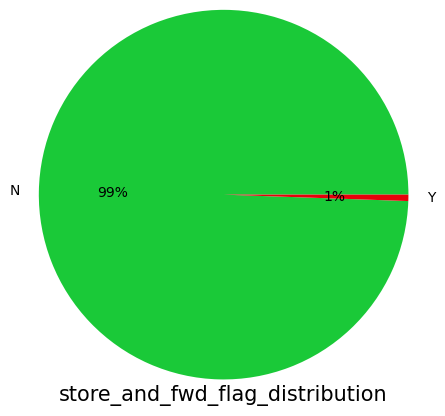

In [32]:
colors = sns.color_palette('bright')[2:4]
plt.pie(data.store_and_fwd_flag.value_counts(), labels = ['N','Y'], colors = colors, radius = 1.25, autopct='%.0f%%')
plt.xlabel('store_and_fwd_flag_distribution', fontsize=15)


**Observations:**

-It is clear that only in 1% where it was required to store the details in vehicle
-a variety of reasons could  be the cause of this like battery was down, loss of signal etc


In [33]:
data[data.flag_Y == 1] # a closer look at the data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,day_name,month,day_num,pickup_hour,flag_N,flag_Y,vendor_id_1,vendor_id_2,month_1,month_2,month_3,month_4,month_5,month_6,day_num_0,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,pickup_hour_0,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_9,check_trip_duration
378,id1347533,1,2016-05-27 18:09:01,2016-05-27 18:16:30,1,-73.976051,40.744671,-73.979721,40.722958,Y,449,2.431075,19.491919,Friday,5,4,18,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,449.0
400,id2733049,1,2016-03-02 20:05:12,2016-03-02 20:52:52,2,-73.978134,40.757484,-73.998955,40.614380,Y,2860,15.988620,20.125535,Wednesday,3,2,20,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2860.0
501,id2484490,1,2016-01-21 08:07:13,2016-01-21 08:18:21,1,-73.999771,40.739487,-73.983940,40.761421,Y,668,2.778597,14.974478,Thursday,1,3,8,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,668.0
644,id2090829,1,2016-01-11 12:10:13,2016-01-11 12:25:41,2,-74.013611,40.714310,-73.976601,40.751938,Y,928,5.218684,20.244895,Monday,1,0,12,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,928.0
1278,id0512889,1,2016-06-10 21:20:14,2016-06-10 21:26:51,1,-73.958183,40.766190,-73.956032,40.782814,Y,397,1.855051,16.821622,Friday,6,4,21,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728481,id0008273,1,2016-04-08 17:52:56,2016-04-08 18:35:36,1,-73.969627,40.760384,-73.862061,40.768559,Y,2560,9.127552,12.835620,Friday,4,4,17,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2560.0
728607,id3254730,1,2016-06-03 01:21:11,2016-06-03 01:30:16,1,-74.004692,40.751846,-74.004860,40.735130,Y,545,1.856349,12.262121,Friday,6,4,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,545.0
729074,id1347803,1,2016-03-17 01:24:10,2016-03-17 01:35:25,1,-73.988808,40.723038,-73.997543,40.695587,Y,675,3.136447,16.727715,Thursday,3,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,675.0
729119,id2265972,1,2016-01-07 07:51:18,2016-01-07 07:51:41,3,-73.782356,40.644211,-73.782364,40.644211,Y,23,0.000645,0.101010,Thursday,1,3,7,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,23.0


**Much of the variable looks similar in distribution expect for vendor column**

In [34]:
data.vendor_id[data.flag_Y == 1].value_counts()

1    4040
Name: vendor_id, dtype: int64

**Interestingly we can see that vendor 1 has all the offline trip data and comparing it with the market share of vendor 2 being dominant. vendor 1 must be using less advanced technology and poor infrastructure**

## Trips per each week day
<a id='plot_1'></a>

Text(0.5, 0, 'day of week')

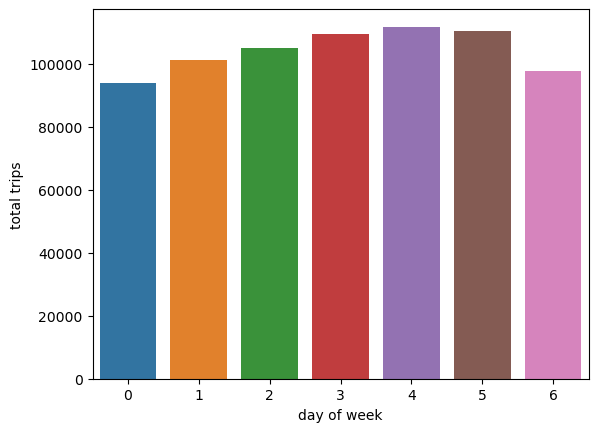

In [35]:
sns.countplot(data.day_num)
plt.ylabel("total trips")
plt.xlabel("day of week")

**The trend is that there is increasing number of trips starting from monday to saturday and decreasing from saturday to monday. clearly because people taking rest during weekends and staying at home**

## Trips per each month
<a id='plot_2'></a>

Text(0, 0.5, 'total trips')

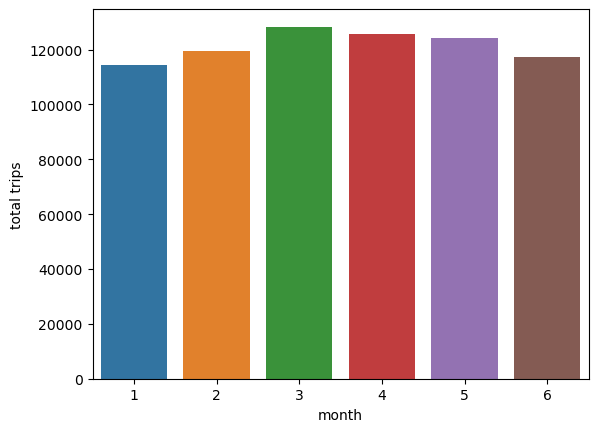

In [36]:
sns.countplot(data.month)
plt.ylabel("total trips")

**The dataset given is spread across only six months but is spread evenly across the most months. From a seasonal point of view  the six months are spread across winter (jan,feb,march) and spring (april,may,june). We can say that there is a small rise in trips as we approach spring and decreases with may and june which are wetter months**

## Trips per hour

Text(0, 0.5, 'total trips')

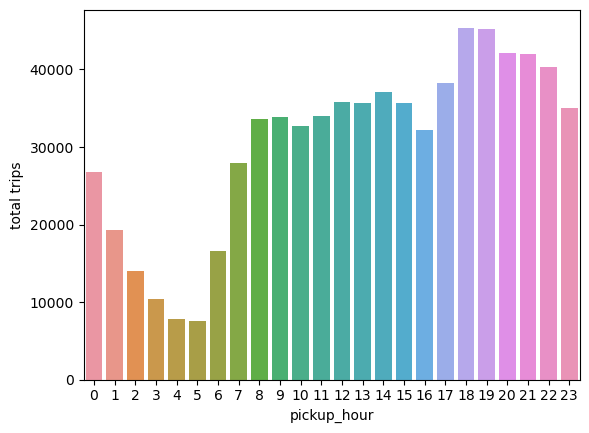

In [37]:
sns.countplot(data.pickup_hour)
plt.ylabel("total trips")

**The pattern of trips is predictale as the most busiet hours are in the evening when most office and school hours end and we can see the increse in trip from morning 6 am and the decline in trips starting at 8 pm**

## Distance

In [38]:
data.distance.describe()

count    729322.000000
mean          3.442464
std           4.356668
min           0.000000
25%           1.233153
50%           2.096073
75%           3.875828
max        1240.510256
Name: distance, dtype: float64

Text(0.5, 0, 'distance')

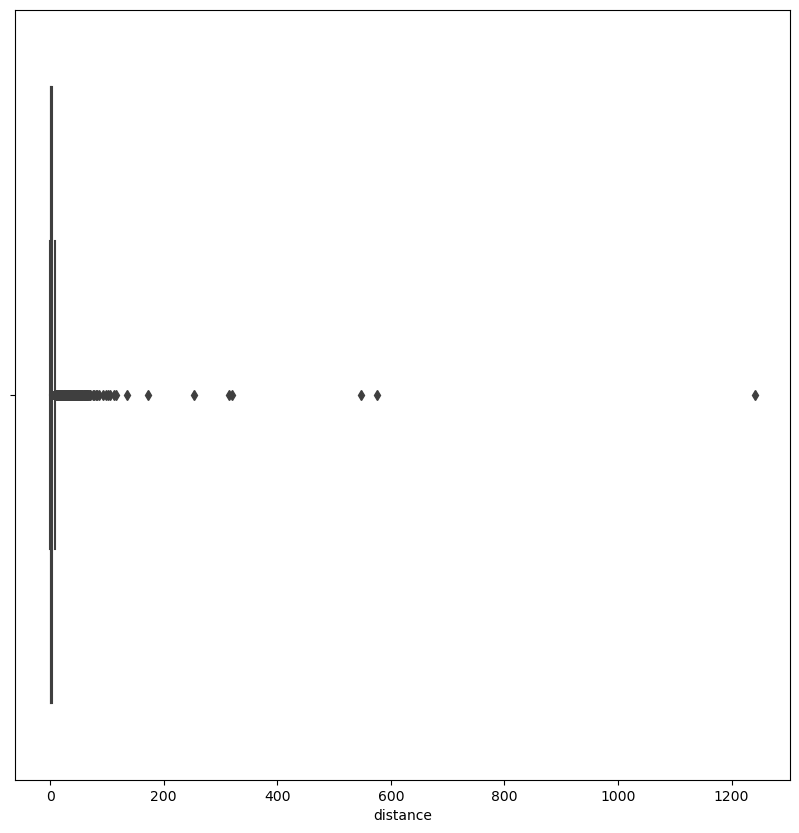

In [39]:
plt.figure(figsize = (10,10))
sns.boxplot(data.distance)
plt.xlabel("distance")

- **There seem to be outliers with trip distances of 0 km and also some with distances of over 200 km**
- **The mean distance travelled is about 3.4 km**
- **The standard deviation is 4.35 km which suggest trips are in between 1 - 10 Km**

In [40]:
data.distance[data.distance == 0].value_counts()

0.0    2901
Name: distance, dtype: int64

**There seems to be about 2.9 k trips with zero distance which could be caused due to human error, software issues, GPS not working**

## Trip Duration ##

In [41]:
#duration in minutes can be better interpreted

data["trip_duration_min"] = data.trip_duration/60

In [42]:
data.trip_duration_min.describe()

count    729322.000000
mean         15.870486
std          64.410437
min           0.016667
25%           6.616667
50%          11.050000
75%          17.916667
max       32328.933333
Name: trip_duration_min, dtype: float64

Text(0.5, 0, 'trip duration (in min)')

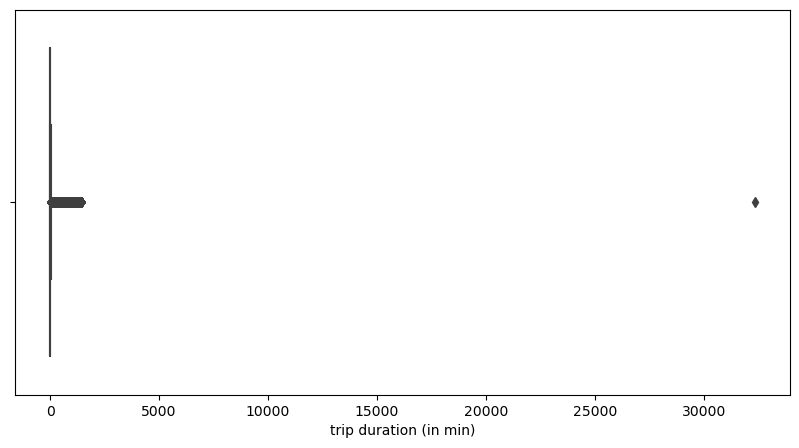

In [43]:
plt.figure(figsize = (10,5))
sns.boxplot(data.trip_duration_min)
plt.xlabel("trip duration (in min)")

**Some trip occur over 30000 min( which are outliers**

**Though there are occurences of low time duration most of the trips are taking between 10 and 20 minutes**


## Speed ##


In [44]:
data.speed.describe()

count    729322.000000
mean         14.424310
std          12.343552
min           0.000000
25%           9.127319
50%          12.799458
75%          17.844018
max        5638.682980
Name: speed, dtype: float64

Text(0.5, 0, 'speed')

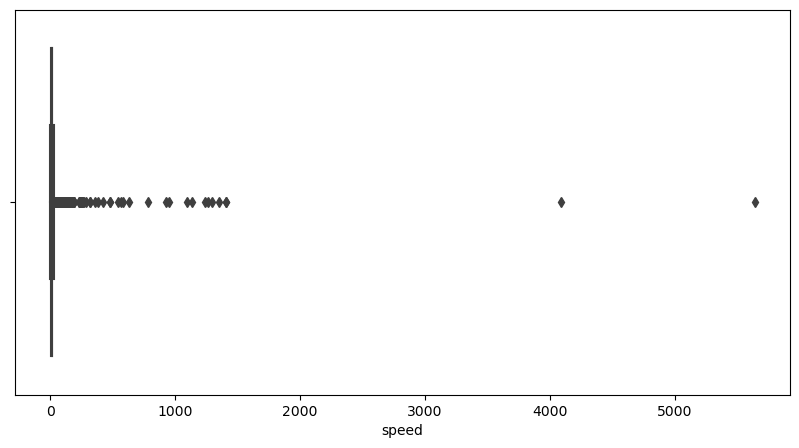

In [45]:
plt.figure(figsize = (10,5))
sns.boxplot(data.speed)
plt.xlabel("speed")

**There are some records with high speed which are way more than 100 km/h. For a normal vechical in NYC even in highway the speed limit is around 100 km/h**

Text(0.5, 0, 'speed')

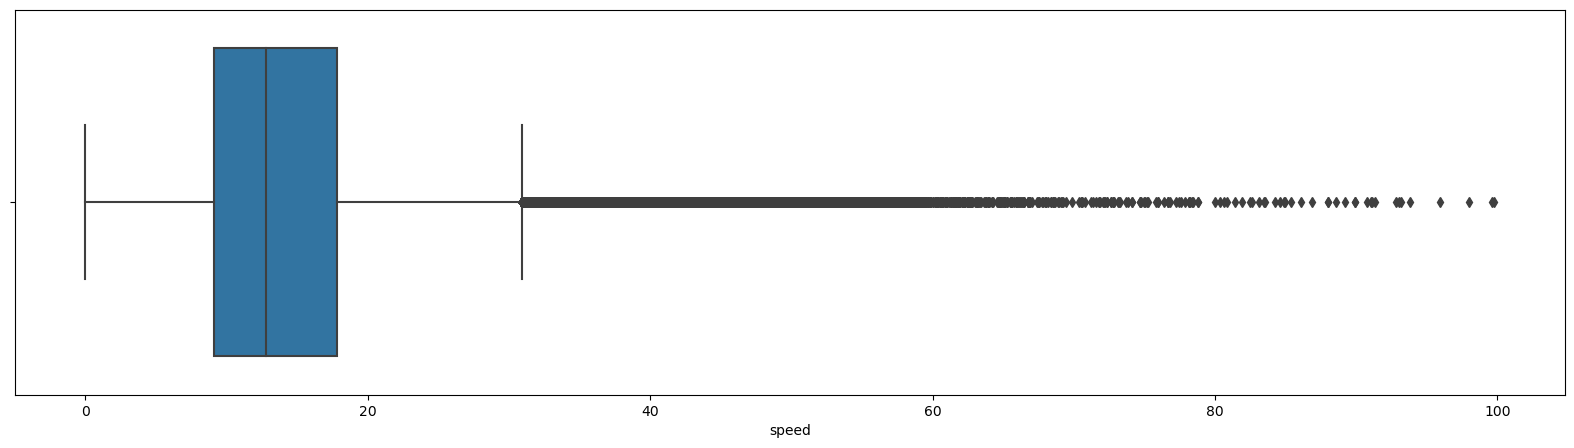

In [46]:
data = data[data.speed <= 100]
plt.figure(figsize = (20,5))
sns.boxplot(data.speed)
plt.xlabel("speed")

- **Trips which are over 30 km/h are being considered as outliers but they under the highest speed limit of 104 km/h on state controlled highways**

- **Mostly trips are done at a speed range of 10-20 km/h with an average speed of around 14 km/h**


# Bivariate analysis

 **Looking at different parameters relation with the target variable which is the trip duration**

## Trip duration per vendor

Text(0.5, 0, 'vendor')

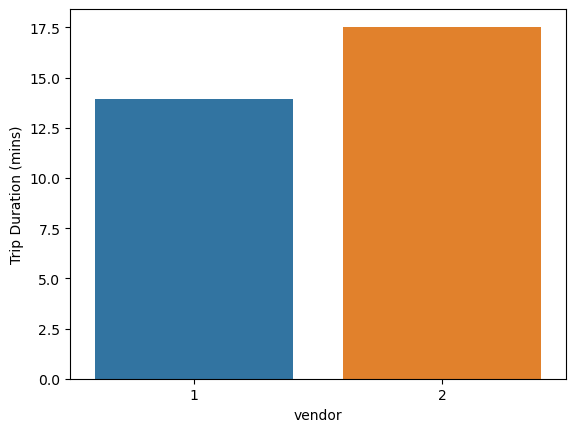

In [47]:
group1 = data.groupby('vendor_id').trip_duration_min.mean()
sns.barplot(group1.index, group1.values)
plt.ylabel('Trip Duration (mins)')
plt.xlabel('vendor')

**Vendor 2 who has the higher market share as we have seen before. This is also reflected in the greater average trip duration of about 4 mins per trip**

## Trip duration per passenger count

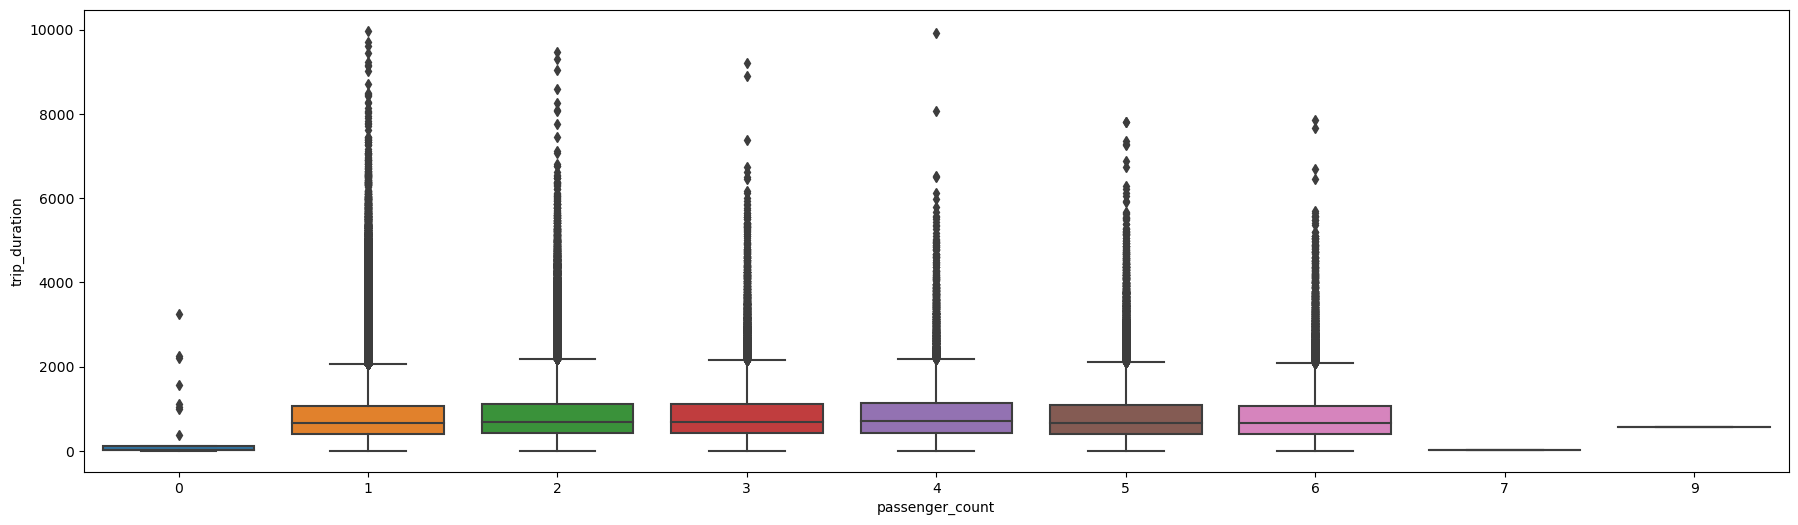

In [48]:
data.passenger_count.value_counts()
plt.figure(figsize=(22, 6))
data_sub = data[data['trip_duration'] < 10000]
sns.boxplot(x="passenger_count", y="trip_duration", data=data_sub)
plt.show()

**There is not much of difference in distribution for passenger count except that for higher count we see a reduction of value of outliers**

## Trip duration per hour

**From the univariate analysis of trip duration, mean is acceptable to be take as measure to plot different patterns with other variable**

Text(0.5, 0, 'Pickup Hour')

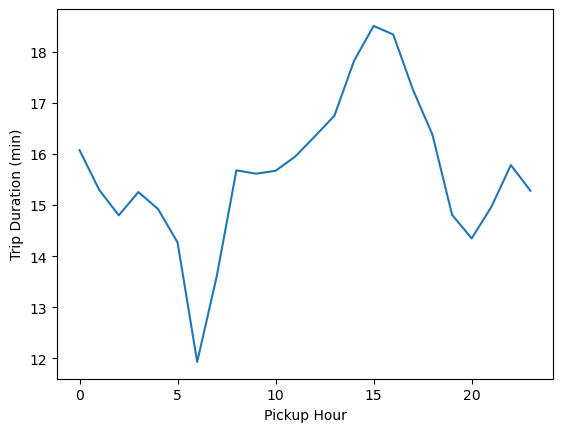

In [49]:
group3 = data.groupby('pickup_hour').trip_duration_min.mean()
sns.lineplot(group3.index, group3.values)
plt.ylabel('Trip Duration (min)')
plt.xlabel('Pickup Hour')


- **mean trip duration is lowest during early morning hours of about 6 AM cause of low traffic**
- **highest spike in graph denotes maximum mean trip duration which is at 3 PM during office and school close hours**


## Trip duration per day of week

Text(0.5, 0, 'day of week')

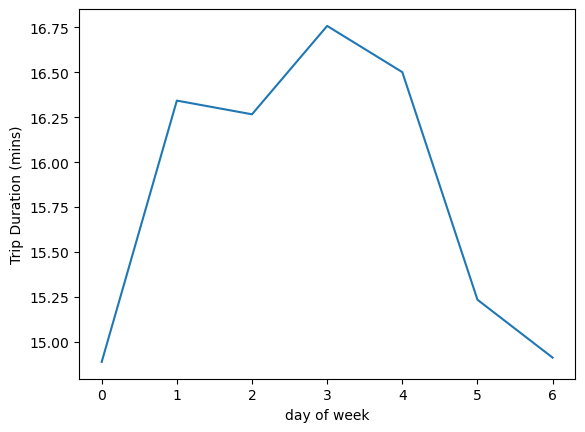

In [50]:
group4 = data.groupby('day_num').trip_duration_min.mean()
sns.lineplot(group4.index, group4.values)
plt.ylabel('Trip Duration (mins)')
plt.xlabel('day of week')

**The trip duration is almost equally distributed across the week on a scale between 15 and 16.75 minutes with small difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.If we look at the trips per day of week plot give above we can see that the increase is traffic is indeed due to more traffic**


[plot reference1](#plot_1)

## Trip duration per month

Text(0.5, 0, 'Month')

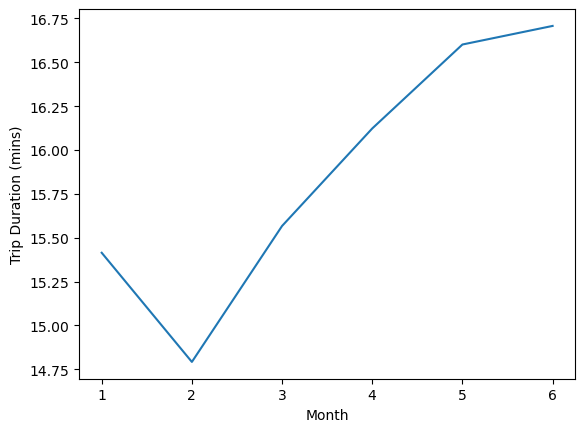

In [51]:
group5 = data.groupby('month').trip_duration_min.mean()
sns.lineplot(group5.index, group5.values)
plt.ylabel('Trip Duration (mins)')
plt.xlabel('Month')

- **There is an increasing trend in the average trip duration with everymonth. It has increased gradually over a period of 6 months with not much difference**
- **It is lowest during february when spring starts**
- **Increase in trip duration on month may and june can be attributed due to being the wettest months while april and may record more trips by the plots above**

[Plot reference 2](#plot_2).

## Trip duration against Distance


Text(0.5, 0, 'Distance')

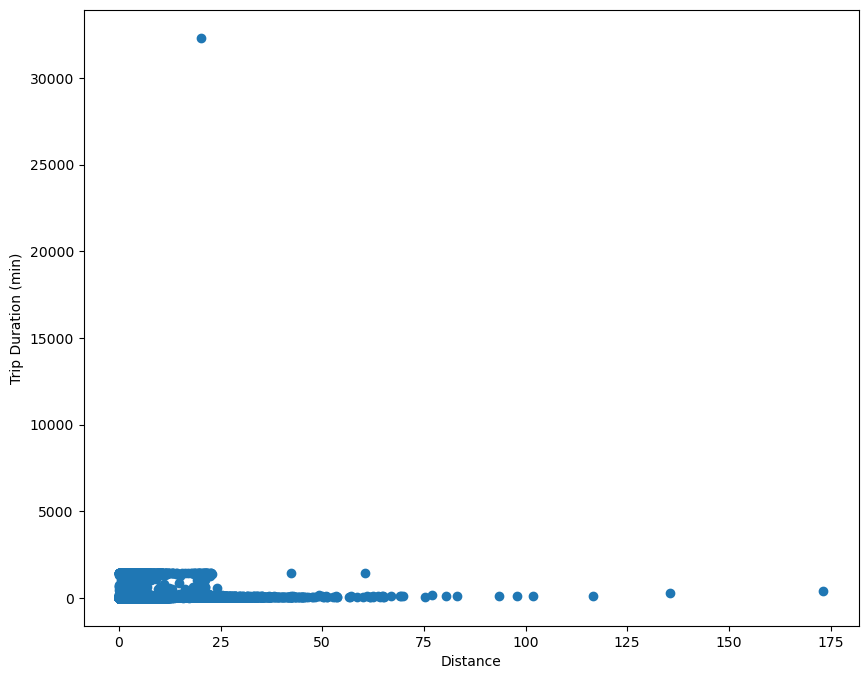

In [52]:
plt.figure(figsize = (10,8))
group6 = data.groupby('distance').trip_duration_min.mean()
plt.scatter(group6.index, group6.values)
plt.ylabel('Trip Duration (min)')
plt.xlabel('Distance')

- **A lots of trips which covered negligible distance but we see some with a trip duration with over 30000 min**
- **There is some proper correlation between the distance covered and the trip duration in the graph but later on there were few trips which covered huge distance of approx 200 kms within very less time frame, which is unlikely and should be treated as outliers**

Text(0, 0.5, 'Trip Duration')

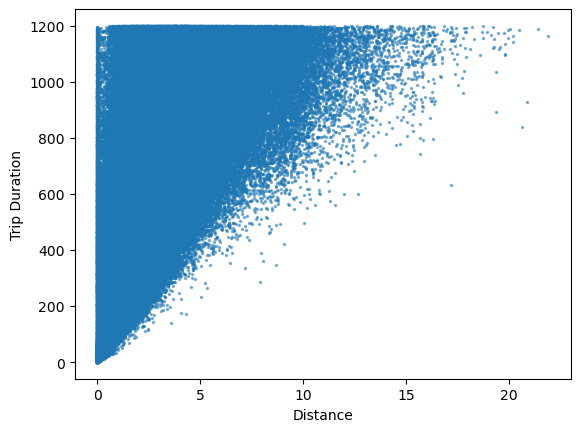

In [53]:
dur_dist = data.loc[(data.distance < 110) & (data.trip_duration_min < 20), ['distance','trip_duration']]
plt.scatter( dur_dist.distance, dur_dist.trip_duration, s= 2, alpha = .5)
plt.xlabel('Distance')
plt.ylabel('Trip Duration')


- **There is a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which have zero duration and under a minute of trip duration thus these are inconsistent readings**

### Correlation Heatmap

Looking at the correlation between all features

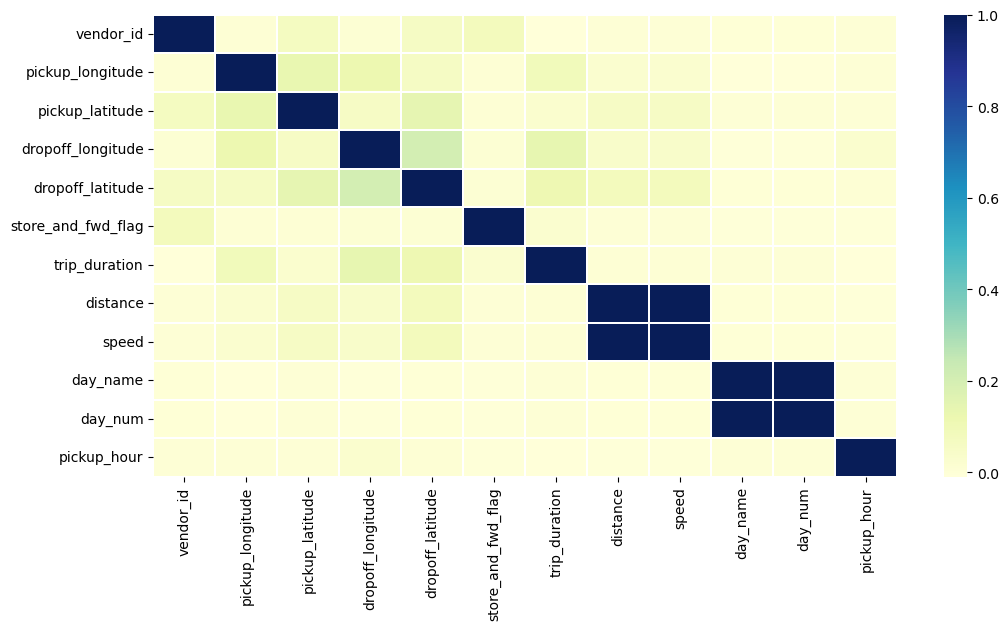

In [54]:
plt.figure(figsize=(12, 6))
datap = datacp.drop(['id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count','month'],
        axis=1)
corr = datap.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## Conclusions

- Vendor 2 has a edge over the number of trips made by about 8%
- Majority of trips are with 1 or 2 passengers.we can see that there are outliers of 7 and 9 passengers
- Some trip occur over 30000 min( which are outliers)
- There are some records with high speed of 200 km/h which are outliers
- Some outliers in distance covered at above 1000km
- The most busiet hours are in the evening 
- Weekends have lesser trips than weekday with maximum trips on thurday
- There is not much of difference in distribution for passenger count except that for higher count we see a reduction of value of outliers
- There is a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which have zero duration and under a minute of trip duration thus these are inconsistent readingS
- Trip duration is lowest during february when spring starts and also increase in trip duration on month may and june can be attributed due to being the wettest months while april and may